# COVID-19 en France

Kelun Chai, Djaber Solimani

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import geopandas as gpd

try:
    from data.France_data import load_hospitaliere
    from data.France_data import load_hospitaliere_new
    from data.France_data import load_hospitaliere_classe_age
    from data.France_data import load_hospitaliere_etablissements
    from data.France_data import load_tests_daily
    from data.France_data import load_meta_hospitaliere
    from data.France_data import load_meta_hospitaliere_new
    from data.France_data import load_meta_hospitaliere_classe_age
    from data.France_data import load_meta_hospitaliere_etablissements
    from data.France_data import load_meta_tests
    from visual.Set_plot import set_plot
    from visual.Set_plot import set_style
    from visual.Set_plot import set_pandas_display_options
except ImportError:
    print('Import failed.')

set_style()
set_pandas_display_options()

## Données hospitalières relatives à l'épidémie de COVID-19
- Les données hospitalières relatives à l'épidémie du COVID-19 par département et sexe du patient.

In [175]:
data_hospitaliere = load_hospitaliere()
meta_hospitaliere = load_meta_hospitaliere()
print("Description:")
display(meta_hospitaliere)

Description:


,Colonne,Type,Description_FR,Description_EN,Exemple
0,dep,integer,Département,Department,1
1,sexe,integer,Sexe,Sex,0
2,jour,string($date),Date de notification,Date of notice,18/03/2020
3,hosp,integer,Nombre de personnes actuellement hospitalisées,Number of people currently hospitalized,2
4,rea,integer,Nombre de personnes actuellement en réanimation ou soins intensifs,Number of people currently in resuscitation or critical care,0
5,rad,integer,Nombre cumulé de personnes retournées à domicile,Total amount of patient that returned home,1
6,dc,integer,Nombre cumulé de personnes décédées à l'hôpital,Total amout of deaths at the hospital,0


In [176]:
data_hospitaliere.head(5)

,dep,sexe,jour,hosp,rea,rad,dc
0,01,0,2020-03-18,2,0,1,0
1,01,1,2020-03-18,1,0,1,0
2,01,2,2020-03-18,1,0,0,0
3,02,0,2020-03-18,41,10,18,11
4,02,1,2020-03-18,19,4,11,6


- Situation globale en France

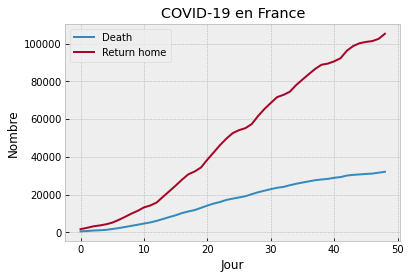

In [177]:
time=data_hospitaliere['jour'].unique()
# display(data_hospitaliere.loc[data_hospitaliere.jour==time[0],['dep','jour','sexe','dc']])
# print(data_hospitaliere.loc[data_hospitaliere.jour==time[0],['dc']].sum())
def death_by_day():
    death=[]
    for i in time:
        num=data_hospitaliere.loc[data_hospitaliere.jour==i,['dc']].sum()
        death.append(num)
    return death

def rad_by_day():
    rad=[]
    for i in time:
        num=data_hospitaliere.loc[data_hospitaliere.jour==i,['rad']].sum()
        rad.append(num)
    return rad
    
def show_global():
    x=np.arange(len(time))
    y=death_by_day()
    y1=rad_by_day()
    plt.plot(x,y,label="Death")
    plt.plot(x,y1,label="Return home")
    plt.title("COVID-19 en France")
    plt.legend()
    plt.xlabel('Jour')
    plt.ylabel("Nombre")
    plt.show()

show_global()

- Situation à Paris

In [178]:
df_paris = data_hospitaliere[data_hospitaliere.dep=='75']

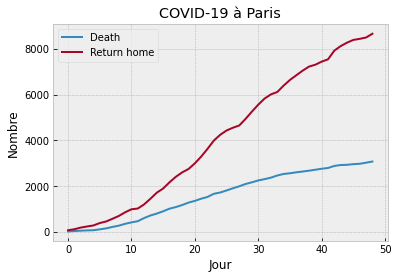

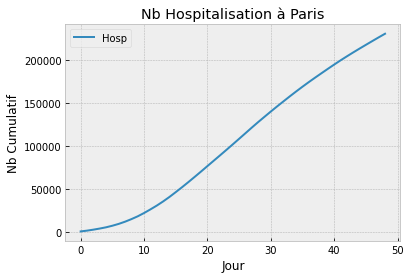

In [179]:
def death_in_paris():
    death=[]
    for i in time:
        num=df_paris.loc[df_paris.jour==i,['dc']].sum()
        death.append(num)
    return death

def rad_in_paris():
    rad=[]
    for i in time:
        num=df_paris.loc[df_paris.jour==i,['rad']].sum()
        rad.append(num)
    return rad

def hosp_in_paris():
    hosp=[]
    for i in time:
        num=df_paris.loc[df_paris.jour==i,['hosp']].sum()
        hosp.append(num)
    cum_hosp = np.array(hosp).cumsum()
    return cum_hosp

def show_global():
    x=np.arange(len(time))
    y=death_in_paris()
    y1=rad_in_paris()
    plt.plot(x,y,label="Death")
    plt.plot(x,y1,label="Return home")
    plt.title("COVID-19 à Paris")
    plt.legend()
    plt.xlabel("Jour")
    plt.ylabel("Nombre")
    plt.show()

def show_hosp_paris():
    x=np.arange(len(time))
    y=hosp_in_paris()
    plt.plot(x,y,label="Hosp")
    plt.title("Nb Hospitalisation à Paris")
    plt.legend()
    plt.xlabel("Jour")
    plt.ylabel("Nb Cumulatif")
    plt.show()
    
show_global()
show_hosp_paris()

### Afficher sur la carte

In [202]:
carte = gpd.read_file('visual/departements-version-simplifiee.geojson')

In [203]:
data = load_hospitaliere_etablissements()
df_today = data.loc[df.jour=="2020-05-05",['dep','nb']]
meta = load_meta_hospitaliere_etablissements()
display(meta)

,Colonne,Type,Description_FR,Description_EN,Exemple
0,dep,integer,Département,Department,1
1,jour,string($date),Date de notification,Date of notice,18/03/2020
2,nb,integer,Nombre cumulé de services hospitaliers ayant déclaré au moins un cas,Total amount of hospital services reporting at least one case,1
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN


In [204]:
data_merge = carte.merge(df_today, left_on='code', right_on='dep', suffixes=('','_y')).drop('dep',axis=1)
data_merge.head(5)

,code,nom,geometry,nb
0,01,Ain,"POLYGON ((4.78021 46.17668, 4.79458 46.21832, 4.80776 46.23697, 4.81099 46.25992, 4.82596 46.27479, 4.83183 46.29689, 4.85276 46.32820, 4.85146 46.35627, 4.88821 46.40298, 4.89182 46.43991, 4.915...",12
1,02,Aisne,"POLYGON ((4.04797 49.40564, 4.03991 49.39740, 4.03550 49.35990, 4.01273 49.35830, 3.99494 49.37790, 3.96131 49.37734, 3.92523 49.40758, 3.89816 49.39325, 3.86486 49.40534, 3.83769 49.39566, 3.856...",12
2,03,Allier,"POLYGON ((3.03207 46.79491, 3.04907 46.75808, 3.08394 46.73763, 3.12978 46.72720, 3.16316 46.69354, 3.19726 46.67993, 3.21555 46.68289, 3.26979 46.71674, 3.30092 46.71630, 3.31397 46.68875, 3.346...",3
3,04,Alpes-de-Haute-Provence,"POLYGON ((5.67604 44.19143, 5.69209 44.18648, 5.71391 44.19927, 5.75549 44.21021, 5.77651 44.20553, 5.79539 44.21346, 5.82857 44.20067, 5.90931 44.19047, 5.91474 44.20343, 5.88179 44.21100, 5.860...",7
4,05,Hautes-Alpes,"POLYGON ((6.26057 45.12685, 6.29922 45.10855, 6.33130 45.11812, 6.36294 45.10449, 6.37353 45.08415, 6.36488 45.07017, 6.39391 45.06182, 6.43860 45.06258, 6.45180 45.05172, 6.48623 45.05607, 6.480...",6


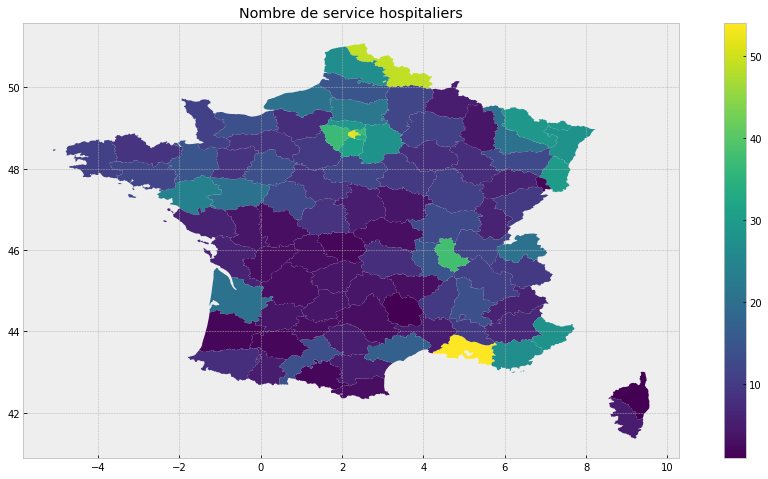

In [205]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(16, 8)
data_merge.plot(column='nb',ax=ax,legend=True)
plt.title("Nombre de service hospitaliers")
plt.show()

## Données relatives aux tests de dépistage de COVID-19 réalisés en laboratoire de ville

In [206]:
data_tests = load_tests_daily()
meta_tests = load_meta_tests()
display(meta_tests)

/home/klchai/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3331: DtypeWarning:

Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.



,Colonne,Type,Description_FR,Description_EN,Exemple
0,dep,integer,Département,Department,1
1,jour,string($date),Date de notification,Date of notice,10/03/2020
2,clage_covid,string,Tranche d'âge des patients,Age group of patients,A
3,nb_test,integer,Nombre de tests pour recherche de SARS-CoV-2,Number of tests for SARS-CoV-2 search,1
4,nb_pos,integer,Nombre de tests positifs pour recherche de SARS-CoV-2,Number of positive tests for SARS-CoV-2,1
5,tx_pos,integer,Taux de tests positif pour recherche de SARS-CoV-2,Positive test rate for SARS-CoV-2 search,2
6,nb_test_h,integer,Nombre de tests pour recherche de SARS-CoV-2 - Hommes,Number of tests for SARS-CoV-2 search - Male,1
7,nb_pos_h,integer,Nombre de tests positifs pour recherche de SARS-CoV-2 - Hommes,Number of positive tests for SARS-CoV-2 - Male,1
8,nb_test_f,integer,Nombre de tests pour recherche de SARS-CoV-2 - Femmes,Number of tests for SARS-CoV-2 search - Female,1
9,nb_pos_f,integer,Nombre de tests positifs pour recherche de SARS-CoV-2 - Femmes,Number of positive tests for SARS-CoV-2 - Female,1


In [207]:
data_tests.head(10)

,dep,jour,clage_covid,nb_test,nb_pos,nb_test_h,nb_pos_h,nb_test_f,nb_pos_f
0,1,2020-03-10,0,0,0,0,0,0,0
1,1,2020-03-10,A,0,0,0,0,0,0
2,1,2020-03-10,B,0,0,0,0,0,0
3,1,2020-03-10,C,0,0,0,0,0,0
4,1,2020-03-10,D,0,0,0,0,0,0
5,1,2020-03-10,E,0,0,0,0,0,0
6,1,2020-03-11,0,0,0,0,0,0,0
7,1,2020-03-11,A,0,0,0,0,0,0
8,1,2020-03-11,B,0,0,0,0,0,0
9,1,2020-03-11,C,0,0,0,0,0,0
